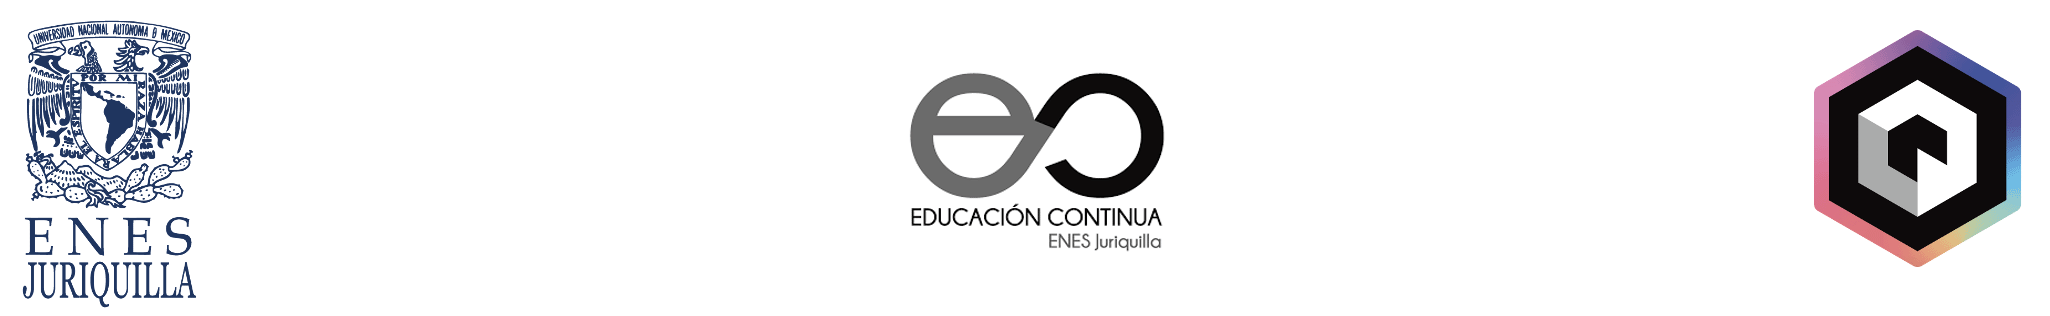

# Inteligencia Artificial - Redes Neuronales Recurrentes
## Predicción de la siguiente palabra
### Autor: Ulises Olivares Pinto
### 12 de marzo de 2024



# Ejemplo de Predicción de la Siguiente Palabra Usando SimpleRNN

Este notebook demuestra cómo construir un modelo SimpleRNN en Keras para predecir la siguiente palabra en una secuencia de palabras.
    

In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

# Corpus de texto
text = "En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lentejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los días de entre semana se honraba con su vellori de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años, era de complexión recia, seco de carnes, enjuto de rostro; gran madrugador y amigo de la caza. Quieren decir que tenía el sobrenombre de Quijada o Quesada (que en esto hay alguna diferencia en los autores que deste caso escriben), aunque por conjeturas verosímiles se deja entender que se llama Quijana; pero esto importa poco a nuestro cuento; basta que en la narración dél no se salga un punto de la verdad. Es, pues, de saber, que este sobredicho hidalgo, los ratos que estaba ocioso (que eran los más del año) se daba a leer libros de caballerías con tanta afición y gusto, que olvidó casi de todo punto el ejercicio de la caza, y aun la administración de su hacienda; y llegó a tanto su curiosidad y desatino en esto, que vendió muchas hanegas de tierra de sembradura, para comprar libros de caballerías en que leer; y así llevó a su casa todos cuantos pudo haber dellos; y de todos ningunos le parecían tan bien como los que compuso el famoso Feliciano de Silva: porque la claridad de su prosa, y aquellas intrincadas razones suyas, le parecían de perlas; y más cuando llegaba a leer aquellos requiebros y cartas de desafío, donde en muchas partes hallaba escrito: la razón de la sinrazón que a mi razón se hace, de tal manera mi razón enflaquece, que con razón me quejo de la vuestra fermosura, y también cuando leía: los altos cielos que de vuestra divinidad divinamente con las estrellas se fortifican, y os hacen merecedora del merecimiento que merece la vuestra grandeza. Con estas y semejantes razones perdía el pobre caballero el juicio, y desvelábase por entenderlas, y desentrañarles el sentido, que no se lo sacara, ni las entendiera el mismo Aristóteles, si resucitara para sólo ello. No estaba muy bien con las heridas que don Belianis daba y recibía, porque se imaginaba que por grandes maestros que le hubiesen curado, no dejaría de tener el rostro y todo el cuerpo lleno de cicatrices y señales; pero con todo alababa en su autor aquel acabar su libro con la promesa de aquella inacabable aventura, y muchas veces le vino deseo de tomar la pluma, y darle fin al pie de la letra como allí se promete; y sin duda alguna lo hiciera, y aun saliera con ello, si otros mayores y continuos pensamientos no se lo estorbaran."

# Tokenización
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
encoded = tokenizer.texts_to_sequences([text])[0]


In [ ]:
print(len(text))
print(len(encoded))
print(encoded)

3080
542
[9, 16, 58, 1, 4, 59, 1, 60, 61, 11, 62, 63, 11, 64, 65, 66, 3, 67, 16, 19, 1, 5, 1, 68, 9, 69, 70, 71, 29, 72, 2, 73, 74, 20, 75, 1, 76, 14, 77, 3, 78, 79, 13, 14, 80, 81, 2, 82, 5, 83, 84, 5, 85, 86, 87, 1, 88, 5, 89, 90, 13, 91, 30, 1, 10, 31, 6, 92, 93, 94, 95, 1, 96, 97, 1, 98, 21, 13, 99, 7, 100, 101, 1, 15, 32, 5, 102, 1, 103, 104, 8, 105, 7, 10, 106, 1, 15, 14, 107, 33, 9, 10, 34, 20, 108, 3, 109, 1, 5, 110, 2, 20, 111, 3, 11, 35, 12, 5, 112, 2, 16, 113, 1, 114, 2, 115, 3, 36, 116, 6, 29, 22, 117, 4, 118, 119, 4, 120, 1, 37, 19, 7, 5, 121, 122, 123, 1, 124, 125, 126, 1, 127, 128, 1, 38, 129, 130, 2, 131, 1, 4, 39, 132, 133, 3, 33, 6, 134, 1, 135, 136, 137, 3, 9, 23, 138, 40, 139, 9, 5, 140, 3, 141, 142, 143, 144, 24, 145, 146, 8, 147, 148, 3, 8, 149, 150, 41, 23, 151, 152, 12, 37, 153, 154, 3, 9, 4, 155, 156, 11, 8, 157, 16, 42, 1, 4, 158, 159, 160, 1, 161, 3, 162, 163, 19, 5, 164, 3, 43, 165, 3, 166, 5, 14, 44, 167, 8, 45, 12, 25, 46, 1, 47, 7, 168, 169, 2, 170, 3, 17

In [ ]:
# Preparar secuencias de entrada/salida
sequences = []
for i in range(1, len(encoded)):
    sequence = encoded[max(0, i-3):i+1]
    print(sequence)
    sequences.append(sequence)

[9, 16]
[9, 16, 58]
[9, 16, 58, 1]
[16, 58, 1, 4]
[58, 1, 4, 59]
[1, 4, 59, 1]
[4, 59, 1, 60]
[59, 1, 60, 61]
[1, 60, 61, 11]
[60, 61, 11, 62]
[61, 11, 62, 63]
[11, 62, 63, 11]
[62, 63, 11, 64]
[63, 11, 64, 65]
[11, 64, 65, 66]
[64, 65, 66, 3]
[65, 66, 3, 67]
[66, 3, 67, 16]
[3, 67, 16, 19]
[67, 16, 19, 1]
[16, 19, 1, 5]
[19, 1, 5, 1]
[1, 5, 1, 68]
[5, 1, 68, 9]
[1, 68, 9, 69]
[68, 9, 69, 70]
[9, 69, 70, 71]
[69, 70, 71, 29]
[70, 71, 29, 72]
[71, 29, 72, 2]
[29, 72, 2, 73]
[72, 2, 73, 74]
[2, 73, 74, 20]
[73, 74, 20, 75]
[74, 20, 75, 1]
[20, 75, 1, 76]
[75, 1, 76, 14]
[1, 76, 14, 77]
[76, 14, 77, 3]
[14, 77, 3, 78]
[77, 3, 78, 79]
[3, 78, 79, 13]
[78, 79, 13, 14]
[79, 13, 14, 80]
[13, 14, 80, 81]
[14, 80, 81, 2]
[80, 81, 2, 82]
[81, 2, 82, 5]
[2, 82, 5, 83]
[82, 5, 83, 84]
[5, 83, 84, 5]
[83, 84, 5, 85]
[84, 5, 85, 86]
[5, 85, 86, 87]
[85, 86, 87, 1]
[86, 87, 1, 88]
[87, 1, 88, 5]
[1, 88, 5, 89]
[88, 5, 89, 90]
[5, 89, 90, 13]
[89, 90, 13, 91]
[90, 13, 91, 30]
[13, 91, 30, 1]
[91, 30, 

In [ ]:
# Padding de las secuencias para asegurar una longitud constante
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

print(max_length)
print(sequences)




4
[[  0   0   9  16]
 [  0   9  16  58]
 [  9  16  58   1]
 ...
 [289 290  11   8]
 [290  11   8  15]
 [ 11   8  15 291]]


In [ ]:
# Separar en entradas (X) y salida (y)
sequences = np.array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=len(tokenizer.word_index) + 1)
print("X", X)
print("y",y[2])

X [[  0   0   9]
 [  0   9  16]
 [  9  16  58]
 ...
 [289 290  11]
 [290  11   8]
 [ 11   8  15]]
y [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Dimensiones del embedding
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 10

# Construir el modelo
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length-1))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(vocab_size, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:

# Entrenar el modelo
model.fit(X, y, epochs=100, verbose=1)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9386 - loss: 0.6014
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9268 - loss: 0.6139
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9461 - loss: 0.5727
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9479 - loss: 0.5718
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9386 - loss: 0.5601
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9461 - loss: 0.5632
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9555 - loss: 0.5414
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9512 - loss: 0.5590 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9637 - loss: 0.5269
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9639 - loss: 0.4801
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9565 - loss: 0.4748
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

In [ ]:

def predict_next_word(model, tokenizer, text_sequence):
    encoded_sequence = tokenizer.texts_to_sequences([text_sequence])[0]
    encoded_sequence = pad_sequences([encoded_sequence], maxlen=max_length-1, padding='pre')
    prediction = model.predict(encoded_sequence)
    print(prediction)
    predicted_word_index = np.argmax(prediction)
    print(predicted_word_index)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

# Ejemplo de predicción
sequence = "uno dos tres"
predicted_word = predict_next_word(model, tokenizer, sequence)
print(f" '{sequence}' {predicted_word}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[3.03633283e-06 7.13271584e-05 1.83649790e-05 1.13732254e-04
  2.61850619e-06 3.69628659e-04 7.25066566e-05 1.30370550e-04
  5.34440687e-06 1.27329084e-03 1.92497919e-06 3.47843510e-03
  2.75006150e-05 2.28276505e-04 2.49002405e-05 3.38075772e-08
  9.34235275e-01 1.28282581e-05 5.15864531e-06 1.02657182e-07
  2.26871862e-06 1.08054223e-07 9.04246917e-06 1.34199392e-04
  4.24934915e-05 2.19055673e-05 3.66348740e-06 6.71820671e-05
  2.17578460e-07 8.27287128e-09 1.01029262e-04 3.06467382e-06
  6.31496448e-07 1.73899699e-02 7.89746991e-07 1.77645290e-06
  5.18231822e-08 3.55593656e-05 1.42029721e-05 1.56090337e-05
  2.57938154e-07 3.61500825e-05 1.91426981e-04 3.64078041e-05
  1.04124803e-04 5.34227922e-07 2.78540018e-08 1.79122362e-05
  8.27174052e-04 8.18103308e-06 1.22773099e-05 8.82623499e-05
  5.50339117e-08 2.49210516e-05 9.46345914e-04 2.54449378e-06
  9.15920769e-04 8.62244575e-04 1.11973109e-02 4.15631030e-06
  5.59891942e-06 6.41828683e-06 